In [1]:
import pandas as pd
import numpy as np
import sqlite3
import ast

In [9]:
con = sqlite3.connect(r"C:/Users/Lenovo/Desktop/subscriber-pipeline-starter-kit/dev/cademycode.db")
cur = con.cursor()
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type='table'")]
print(table_list)


[('cademycode_students',), ('cademycode_courses',), ('cademycode_student_jobs',)]


In [10]:
students = pd.read_sql_query("SELECT * FROM cademycode_students", con)
career_paths = pd.read_sql_query("SELECT * FROM cademycode_courses", con)
student_jobs = pd.read_sql_query("SELECT * FROM cademycode_student_jobs", con)
print('students:', len(students))
print('career_paths:', len(career_paths))
print('student_jobs:', len(student_jobs))

students: 5000
career_paths: 10
student_jobs: 13


In [11]:
students.head(10)

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs
0,1,Annabelle Avery,1943-07-03,F,"{""mailing_address"": ""303 N Timber Key, Irondal...",7.0,6.0,1.0,4.99
1,2,Micah Rubio,1991-02-07,M,"{""mailing_address"": ""767 Crescent Fair, Shoals...",7.0,5.0,8.0,4.4
2,3,Hosea Dale,1989-12-07,M,"{""mailing_address"": ""P.O. Box 41269, St. Bonav...",7.0,8.0,8.0,6.74
3,4,Mariann Kirk,1988-07-31,F,"{""mailing_address"": ""517 SE Wintergreen Isle, ...",6.0,7.0,9.0,12.31
4,5,Lucio Alexander,1963-08-31,M,"{""mailing_address"": ""18 Cinder Cliff, Doyles b...",7.0,14.0,3.0,5.64
5,6,Shavonda Mcmahon,1989-10-15,F,"{""mailing_address"": ""P.O. Box 81591, Tarpon Sp...",6.0,10.0,3.0,10.12
6,7,Terrell Bleijenberg,1959-05-05,M,"{""mailing_address"": ""P.O. Box 53471, Oskaloosa...",2.0,9.0,8.0,24.17
7,8,Stanford Allan,1997-11-22,M,"{""mailing_address"": ""255 Spring Avenue, Point ...",3.0,3.0,1.0,19.54
8,9,Tricia Delacruz,1961-10-20,F,"{""mailing_address"": ""997 Dewy Apple, Lake Lind...",1.0,6.0,9.0,1.75
9,10,Regenia van der Helm,1999-02-23,N,"{""mailing_address"": ""220 Middle Ridge, Falcon ...",5.0,7.0,6.0,13.55


In [12]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uuid                    5000 non-null   int64 
 1   name                    5000 non-null   object
 2   dob                     5000 non-null   object
 3   sex                     5000 non-null   object
 4   contact_info            5000 non-null   object
 5   job_id                  4995 non-null   object
 6   num_course_taken        4749 non-null   object
 7   current_career_path_id  4529 non-null   object
 8   time_spent_hrs          4529 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


In [13]:
students.describe()

,uuid
count,5000.000000
mean,2500.500000
std,1443.520003
min,1.000000
25%,1250.750000
50%,2500.500000
75%,3750.250000
max,5000.000000


In [24]:
students[students.isnull().any(axis=1)]

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs
15,16,Norene Dalton,1976-04-30,F,"{""mailing_address"": ""130 Wishing Essex, Branch...",6.0,0.0,None,None
19,20,Sofia van Steenbergen,1990-02-21,N,"{""mailing_address"": ""634 Clear Barn Dell, Beam...",7.0,13.0,None,None
25,26,Doug Browning,1970-06-08,M,"{""mailing_address"": ""P.O. Box 15845, Devine, F...",7.0,None,5.0,1.92
26,27,Damon Schrauwen,1953-10-31,M,"{""mailing_address"": ""P.O. Box 84659, Maben, Ge...",4.0,None,10.0,3.73
30,31,Christoper Warner,1989-12-28,M,"{""mailing_address"": ""556 Stony Highlands, Drai...",2.0,5.0,None,None
...,...,...,...,...,...,...,...,...,...
4948,4949,Dewitt van Malsem,1949-03-08,M,"{""mailing_address"": ""423 Course Trail, Wilmot,...",4.0,7.0,None,None
4956,4957,Todd Stamhuis,1961-06-15,M,"{""mailing_address"": ""251 Grand Rose Underpass,...",7.0,8.0,None,None
4974,4975,Jorge Creelman,1944-11-24,M,"{""mailing_address"": ""919 Well Overpass, Linden...",2.0,15.0,None,None
4980,4981,Brice Franklin,1946-12-01,M,"{""mailing_address"": ""947 Panda Way, New Bedfor...",4.0,None,5.0,8.66


In [ ]:
students['contact_info'] = students["contact_info"].apply(lambda x: ast.literal_eval(x))
explode_contact = pd.json_normalize(students['contact_info'])
students = pd.concat([students.drop('contact_info', axis=1), explode_contact], axis=1)

In [25]:
students.head()

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs
0,1,Annabelle Avery,1943-07-03,F,"{""mailing_address"": ""303 N Timber Key, Irondal...",7.0,6.0,1.0,4.99
1,2,Micah Rubio,1991-02-07,M,"{""mailing_address"": ""767 Crescent Fair, Shoals...",7.0,5.0,8.0,4.4
2,3,Hosea Dale,1989-12-07,M,"{""mailing_address"": ""P.O. Box 41269, St. Bonav...",7.0,8.0,8.0,6.74
3,4,Mariann Kirk,1988-07-31,F,"{""mailing_address"": ""517 SE Wintergreen Isle, ...",6.0,7.0,9.0,12.31
4,5,Lucio Alexander,1963-08-31,M,"{""mailing_address"": ""18 Cinder Cliff, Doyles b...",7.0,14.0,3.0,5.64


In [27]:
print(students.columns)

Index(['uuid', 'name', 'dob', 'sex', 'contact_info', 'job_id',
       'num_course_taken', 'current_career_path_id', 'time_spent_hrs'],
      dtype='object')


In [30]:
students['job_id'] = students['job_id'].astype(float)
students['current_career_path_id'] = students['current_career_path_id'].astype(float)
students['num_course_taken'] = students['num_course_taken'].astype(float)
students['time_spent_hrs'] = students['time_spent_hrs'].astype(float)
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    5000 non-null   int64         
 1   name                    5000 non-null   object        
 2   dob                     5000 non-null   datetime64[ns]
 3   sex                     5000 non-null   object        
 4   contact_info            5000 non-null   object        
 5   job_id                  4995 non-null   float64       
 6   num_course_taken        4749 non-null   float64       
 7   current_career_path_id  4529 non-null   float64       
 8   time_spent_hrs          4529 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 351.7+ KB


In [31]:
missing_course_taken = students[students[['num_course_taken']].isnull().any(axis=1)]
display(missing_course_taken)

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs
25,26,Doug Browning,1970-06-08,M,"{""mailing_address"": ""P.O. Box 15845, Devine, F...",7.0,NaN,5.0,1.92
26,27,Damon Schrauwen,1953-10-31,M,"{""mailing_address"": ""P.O. Box 84659, Maben, Ge...",4.0,NaN,10.0,3.73
51,52,Alisa Neil,1977-05-28,F,"{""mailing_address"": ""16 View Annex, Mosses, No...",5.0,NaN,8.0,22.86
70,71,Chauncey Hooper,1962-04-07,M,"{""mailing_address"": ""955 Dewy Flat, Slaughterv...",3.0,NaN,3.0,3.97
80,81,Ellyn van Heest,1984-06-28,F,"{""mailing_address"": ""872 Cider Glade, Chicken,...",3.0,NaN,10.0,12.39
...,...,...,...,...,...,...,...,...,...
4889,4890,Tegan Cochran,1970-11-08,F,"{""mailing_address"": ""106 Sunny Nook, Vernal, G...",5.0,NaN,8.0,22.75
4898,4899,Ruthann Oliver,1998-05-22,F,"{""mailing_address"": ""644 Merry Island, Green V...",3.0,NaN,7.0,21.27
4914,4915,Ernest Holmes,1995-03-11,M,"{""mailing_address"": ""872 Wintergreen Harbor, G...",7.0,NaN,9.0,26.50
4980,4981,Brice Franklin,1946-12-01,M,"{""mailing_address"": ""947 Panda Way, New Bedfor...",4.0,NaN,5.0,8.66


<Axes: xlabel='sex'>

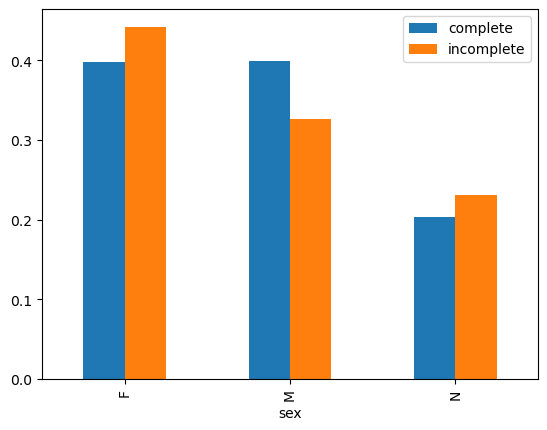

In [32]:
sg = (students.groupby('sex').count()['uuid']/len(students)).rename('complete')
mg = (missing_course_taken.groupby('sex').count()['uuid']/len(missing_course_taken)).rename('incomplete')
df = pd.concat([sg, mg], axis=1)
df.plot.bar()

<Axes: xlabel='job_id'>

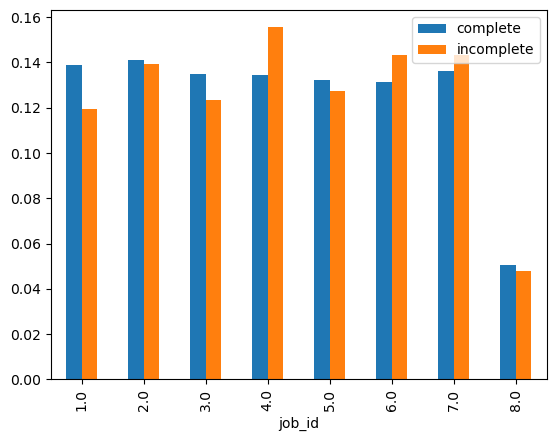

In [34]:
sg = (students.groupby('job_id').count()['uuid']/len(students)).rename('complete')
mg = (missing_course_taken.groupby('job_id').count()['uuid']/len(missing_course_taken)).rename('incomplete')
df = pd.concat([sg, mg], axis = 1)
df.plot.bar()

In [42]:
missing_data = pd.DataFrame()
missing_data = pd.concat([missing_data, missing_course_taken])
students = students.dropna(subset=['num_course_taken'])
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4749 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    4749 non-null   int64         
 1   name                    4749 non-null   object        
 2   dob                     4749 non-null   datetime64[ns]
 3   sex                     4749 non-null   object        
 4   contact_info            4749 non-null   object        
 5   job_id                  4744 non-null   float64       
 6   num_course_taken        4749 non-null   float64       
 7   current_career_path_id  4298 non-null   float64       
 8   time_spent_hrs          4298 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 371.0+ KB


In [15]:
career_paths.head(5)
career_paths.info()
career_paths.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   career_path_id     10 non-null     int64 
 1   career_path_name   10 non-null     object
 2   hours_to_complete  10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


,career_path_id,hours_to_complete
count,10.00000,10.000000
mean,5.50000,21.900000
std,3.02765,6.707376
min,1.00000,12.000000
25%,3.25000,18.500000
50%,5.50000,20.000000
75%,7.75000,26.500000
max,10.00000,35.000000


In [56]:
display(career_paths)

,career_path_id,career_path_name,hours_to_complete
0,1,data scientist,20
1,2,data engineer,20
2,3,data analyst,12
3,4,software engineering,25
4,5,backend engineer,18
5,6,frontend engineer,20
6,7,iOS developer,27
7,8,android developer,27
8,9,machine learning engineer,35
9,10,ux/ui designer,15


In [57]:
not_applicable = {'career_path_id': 0,
                  'career_path_name': 'not applicable',
                  'hours_to_complete': 0}
    
career_paths.loc[len(career_paths)] = not_applicable
display(career_paths)

,career_path_id,career_path_name,hours_to_complete
0,1,data scientist,20
1,2,data engineer,20
2,3,data analyst,12
3,4,software engineering,25
4,5,backend engineer,18
5,6,frontend engineer,20
6,7,iOS developer,27
7,8,android developer,27
8,9,machine learning engineer,35
9,10,ux/ui designer,15


In [16]:
student_jobs.head(5)

,job_id,job_category,avg_salary
0,1,analytics,86000
1,2,engineer,101000
2,3,software developer,110000
3,4,creative,66000
4,5,financial services,135000


In [17]:
student_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_id        13 non-null     int64 
 1   job_category  13 non-null     object
 2   avg_salary    13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 444.0+ bytes


In [59]:
student_jobs.drop_duplicates(inplace=True)
display(student_jobs)

,job_id,job_category,avg_salary
0,1,analytics,86000
1,2,engineer,101000
2,3,software developer,110000
3,4,creative,66000
4,5,financial services,135000
5,6,education,61000
6,7,HR,80000
7,8,student,10000
8,9,healthcare,120000
9,0,other,80000


In [44]:
missing_job_id = students[students[['job_id']].isnull().any(axis=1)]
missing_job_id.head()

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs
162,163,Glen Riley,2002-08-22,M,"{""mailing_address"": ""P.O. Box 37267, Cornlea v...",NaN,8.0,3.0,5.70
757,758,Mercedez Vorberg,2002-03-25,F,"{""mailing_address"": ""284 Cedar Seventh, Virden...",NaN,15.0,4.0,4.14
854,855,Kurt Ho,2002-05-29,M,"{""mailing_address"": ""P.O. Box 27254, Olin, New...",NaN,0.0,8.0,23.72
1029,1030,Penny Gaines,2002-03-01,N,"{""mailing_address"": ""138 Misty Vale, Stockton ...",NaN,15.0,4.0,16.25
1542,1543,Frederick Reilly,2002-11-13,M,"{""mailing_address"": ""P.O. Box 40769, Quakervil...",NaN,7.0,9.0,21.32


In [48]:
#missing_data = pd.concat([missing_data, missing_job_id], ignore_index = True)
#students = students.dropna(subset=['job_id'])

In [47]:
print(type(missing_data))
print(type(missing_job_id))
print(missing_data.shape)
print(missing_job_id.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(256, 9)
(5, 9)


In [43]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4749 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    4749 non-null   int64         
 1   name                    4749 non-null   object        
 2   dob                     4749 non-null   datetime64[ns]
 3   sex                     4749 non-null   object        
 4   contact_info            4749 non-null   object        
 5   job_id                  4744 non-null   float64       
 6   num_course_taken        4749 non-null   float64       
 7   current_career_path_id  4298 non-null   float64       
 8   time_spent_hrs          4298 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 371.0+ KB


In [49]:
missing_path_id = students[students[['current_career_path_id']].isnull().any(axis=1)]
missing_path_id.head()

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs
15,16,Norene Dalton,1976-04-30,F,"{""mailing_address"": ""130 Wishing Essex, Branch...",6.0,0.0,NaN,NaN
19,20,Sofia van Steenbergen,1990-02-21,N,"{""mailing_address"": ""634 Clear Barn Dell, Beam...",7.0,13.0,NaN,NaN
30,31,Christoper Warner,1989-12-28,M,"{""mailing_address"": ""556 Stony Highlands, Drai...",2.0,5.0,NaN,NaN
49,50,Antony Horne,1996-05-29,M,"{""mailing_address"": ""P.O. Box 78685, Lenox, Te...",3.0,2.0,NaN,NaN
54,55,Omar Bunk,1955-11-08,M,"{""mailing_address"": ""445 Dale Hollow, Vermont ...",3.0,14.0,NaN,NaN


In [50]:
missing_path_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, 15 to 4974
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    451 non-null    int64         
 1   name                    451 non-null    object        
 2   dob                     451 non-null    datetime64[ns]
 3   sex                     451 non-null    object        
 4   contact_info            451 non-null    object        
 5   job_id                  451 non-null    float64       
 6   num_course_taken        451 non-null    float64       
 7   current_career_path_id  0 non-null      float64       
 8   time_spent_hrs          0 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 35.2+ KB


In [51]:
students['current_career_path_id'].unique()

array([ 1.,  8.,  9.,  3.,  6., 10.,  5., nan,  4.,  7.,  2.])

In [54]:
students['current_career_path_id'] = np.where(students['current_career_path_id'].isnull(), 0, students['current_career_path_id'])
students['time_spent_hrs'] = np.where(students['time_spent_hrs'].isnull(), 0, students['time_spent_hrs'])

In [55]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4744 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    4744 non-null   int64         
 1   name                    4744 non-null   object        
 2   dob                     4744 non-null   datetime64[ns]
 3   sex                     4744 non-null   object        
 4   contact_info            4744 non-null   object        
 5   job_id                  4744 non-null   float64       
 6   num_course_taken        4744 non-null   float64       
 7   current_career_path_id  4744 non-null   float64       
 8   time_spent_hrs          4744 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 370.6+ KB


In [60]:
students['job_id'] = students['job_id'].astype(int)
students['current_career_path_id'] = students['current_career_path_id'].astype(int)

In [61]:
final_df = students.merge(career_paths, left_on='current_career_path_id', right_on='career_path_id', how='left')
final_df = final_df.merge(student_jobs, on='job_id', how='left')
final_df.head()

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs,career_path_id,career_path_name,hours_to_complete,job_category,avg_salary
0,1,Annabelle Avery,1943-07-03,F,"{""mailing_address"": ""303 N Timber Key, Irondal...",7,6.0,1,4.99,1,data scientist,20,HR,80000
1,2,Micah Rubio,1991-02-07,M,"{""mailing_address"": ""767 Crescent Fair, Shoals...",7,5.0,8,4.40,8,android developer,27,HR,80000
2,3,Hosea Dale,1989-12-07,M,"{""mailing_address"": ""P.O. Box 41269, St. Bonav...",7,8.0,8,6.74,8,android developer,27,HR,80000
3,4,Mariann Kirk,1988-07-31,F,"{""mailing_address"": ""517 SE Wintergreen Isle, ...",6,7.0,9,12.31,9,machine learning engineer,35,education,61000
4,5,Lucio Alexander,1963-08-31,M,"{""mailing_address"": ""18 Cinder Cliff, Doyles b...",7,14.0,3,5.64,3,data analyst,12,HR,80000


In [63]:
sqlite_connection = sqlite3.connect('cademycode_cleansed.db')
final_df.to_sql('cademycode_aggregated', sqlite_connection, if_exists='replace', index=False)

4744

In [64]:
db_df = pd.read_sql_query("SELECT * FROM cademycode_aggregated", sqlite_connection)

In [65]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4744 entries, 0 to 4743
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    4744 non-null   int64  
 1   name                    4744 non-null   object 
 2   dob                     4744 non-null   object 
 3   sex                     4744 non-null   object 
 4   contact_info            4744 non-null   object 
 5   job_id                  4744 non-null   int64  
 6   num_course_taken        4744 non-null   float64
 7   current_career_path_id  4744 non-null   int64  
 8   time_spent_hrs          4744 non-null   float64
 9   career_path_id          4744 non-null   int64  
 10  career_path_name        4744 non-null   object 
 11  hours_to_complete       4744 non-null   int64  
 12  job_category            4744 non-null   object 
 13  avg_salary              4744 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memor

In [66]:
missing_data.to_sql('incomplete_data', sqlite_connection, if_exists='replace', index=False)

261

In [70]:
missing_df = pd.read_sql_query("SELECT * FROM incomplete_data", sqlite_connection)
sqlite_connection.close()

In [71]:
db_df.to_csv('cademycode_cleansed.csv')